# Task

### Цели
Цель настоящей работы состоит в том, чтобы использовать методы обучения без учителя для настройки начальных значений весов сетей, построенных при выполнении предшествующих практических работ. 
### Задачи 
Выполнение лабораторной работы предполагает решение следующих задач: 
1. Выбор архитектур нейронных сетей, построенных при выполнении предшествующих практических работ.
2. Выбор методов обучения без учителя для выполнения настройки начальных значений весов сетей. 
3. Применение методов обучения без учителя к выбранному набору сетей. 
4. Сбор результатов экспериментов.

### Общая последовательность действий Работа предусматривает выполнение следующей последовательности действий: 
1. Разработка скриптов для описания сетей, реализующих методы обучения без учителя применительно к выбранным архитектурам нейронных сетей. Скрипты предоставляются в формате, доступном библиотеке. 
2. Обучение разработанных глубоких моделей для получения начальных значений весов требует подготовки скриптов для обучения разработанных архитектур сетей. 
3. Обучение выбранных архитектур нейронных сетей, при этом необходимо выполнить начальную инициализацию весов сетей значениями, полученными в ходе обучения без учителя. 
4. Тестирование обученных глубоких моделей требует запуска скриптов для тестирования архитектур сетей, разработанных в ходе выполнения предыдущих лабораторных работ. 
5. Сбор результатов тестирования разработанных архитектур сетей. 
6. Публикация разработанных программ/скриптов в личном репозитории на GitHub. Структура репозитория описана в одной из предыдущих практических работ. 
7. Подготовка отчета, содержащего минимальный объем информации по каждому этапу выполнения работы. Типовая структура отчета описана в более ранней практической работе. 
  1. Разработанные программы/скрипты. Пофайловое описание содержимого директории src. 
  2. Тестовые конфигурации сетей. Раздел содержит визуальные схемы конфигураций нейронных сетей и конфигураций, построенных с целью предварительной настройки параметров сети. 
  3. Результаты экспериментов. Раздел содержит табличку, в которой каждая строка соответствует определенной конфигурации нейронной сети, обученной от начального приближения весов, которое построено тем или иным методом обучения без учителя, а столбцы содержат следующую информацию: время обучения модели (с), качество решения задачи на тестовом множестве (в терминологии описанной метрики). Опционально в перечень столбцов можно добавить среднее время решения задачи на одном тестовом примере.

# Data preparation

## Load data

In [90]:
from google.colab import drive
drive.mount('/content/drive')
%pip install keras-metrics

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
cd  '/content/drive/My Drive/DL_PCAM'

/content/drive/My Drive/DL_PCAM


In [0]:
import gzip
import shutil
import pandas as pd
from matplotlib import pyplot
import numpy as np
import cv2 as cv
from keras.utils import HDF5Matrix, normalize
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, BatchNormalization, Dropout, Activation, Input, ZeroPadding2D, Add, Reshape, InputLayer

from keras.layers import Input
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
import keras_metrics as ksm
import tensorflow as tf

In [0]:
train_x_name = 'camelyonpatch_level_2_split_train_x.h5'
train_y_name = 'camelyonpatch_level_2_split_train_y.h5'

test_x_name = 'camelyonpatch_level_2_split_test_x.h5'
test_y_name = 'camelyonpatch_level_2_split_test_y.h5'

valid_x_name = 'camelyonpatch_level_2_split_valid_x.h5'
valid_y_name = 'camelyonpatch_level_2_split_valid_y.h5'

meta_train_name = 'camelyonpatch_level_2_split_train_meta.csv'
meta_valid_name = 'camelyonpatch_level_2_split_valid_meta.csv'
meta_test_name  = 'camelyonpatch_level_2_split_test_meta.csv'

## Normalize data

In [0]:
from keras.utils import HDF5Matrix, normalize
import tensorflow as ktf
sess = ktf.Session()

new_size = 32
dim_size = (new_size, new_size)

x_train = HDF5Matrix(train_x_name, 'x', 
                     normalizer=lambda x: np.true_divide(np.array(ktf.image.resize_images(x, dim_size).eval(session=sess)), 255.))
y_train = HDF5Matrix(train_y_name, 'y')

x_valid = HDF5Matrix(valid_x_name, 'x', 
                     normalizer=lambda x: np.true_divide(np.array(ktf.image.resize_images(x, dim_size).eval(session=sess)), 255.))
y_valid = HDF5Matrix(valid_y_name, 'y')

x_test  = HDF5Matrix(test_x_name, 'x', 
                     normalizer=lambda x: np.true_divide(np.array(ktf.image.resize_images(x, dim_size).eval(session=sess)), 255.))
y_test  = HDF5Matrix(test_y_name, 'y')

## Show some examples of data

262144
<class 'keras.utils.io_utils.HDF5Matrix'>
<class 'numpy.ndarray'>
(32, 32, 3)


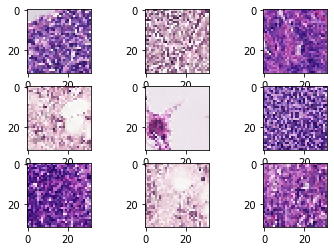

In [95]:
print(len(x_train))
print(type(x_train))
print(type(x_train[0]))
print(x_train[0].shape)

for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()


# Reshape labels

In [96]:
# Input image dimensions.
input_shape = x_train.shape[1:]

y_train = np.array(y_train)
y_train = y_train.reshape((y_train.shape[0], 1))

y_valid = np.array(y_valid)
y_valid = y_valid.reshape((y_valid.shape[0], 1))

y_test = np.array(y_test)
y_test = y_test.reshape((y_test.shape[0], 1))

print('input share:', input_shape)
print('x_train shape:', x_train.shape)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

input share: (32, 32, 3)
x_train shape: (262144, 32, 32, 3)
262144 train samples
32768 test samples
y_train shape: (262144, 1)


In [97]:
y_train = np.array(y_train)
y_train = y_train.reshape((y_train.shape[0], 1))
print("1 in train : {}".format(np.count_nonzero(y_train == 1)))
print("0 in train : {}".format(np.count_nonzero(y_train == 0)))

y_valid = np.array(y_valid)
y_valid = y_valid.reshape((y_valid.shape[0], 1))
print("1 in valid : {}".format(np.count_nonzero(y_valid == 1)))
print("0 in valid : {}".format(np.count_nonzero(y_valid == 0)))

1 in train : 131072
0 in train : 131072
1 in valid : 16369
0 in valid : 16399


# Resnet

In [0]:
# Model params 
L2_REG = 1e-3       # 1e-4
LEARN_RATE = 1e-3   # 1e-3
BATH_NORM = True    # False

In [0]:
# FIXME Remove this code as we don't use sheduling 
def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    # lr = 1e-3
    lr = LEARN_RATE
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

# FCN with the same layers

In [0]:
def encoder_net(full_size,
                hidden_activation = 'sigmoid',
                activation = 'relu',
                initializer='random_uniform'):
  
    name_model = 'encoder FCN'
    model = Sequential([
    # ---------------------------------------------------------#
    Reshape((1, 1, full_size,)),
    # ---------------------------------------------------------#
    Dense(int(full_size), 
          kernel_initializer=initializer, 
          bias_initializer=initializer), 
    Activation(hidden_activation),
    # ---------------------------------------------------------#
    Dense(int(full_size), 
          kernel_initializer=initializer, 
          bias_initializer=initializer), 
    Activation(hidden_activation),
    # ---------------------------------------------------------#
    Dense(int(full_size), 
          kernel_initializer=initializer, 
          bias_initializer=initializer), 
    Activation(hidden_activation),
    # ---------------------------------------------------------#
    Dense(int(full_size / 2), 
          kernel_initializer=initializer, 
          bias_initializer=initializer), 
    Activation(hidden_activation),
    # ---------------------------------------------------------#
    Dense(int(full_size / 4), 
          kernel_initializer=initializer, 
          bias_initializer=initializer), 
    Activation(hidden_activation),
    # ---------------------------------------------------------#
    Dense(int(full_size / 8), 
          kernel_initializer=initializer, 
          bias_initializer=initializer), 
    Activation(hidden_activation),
    # ---------------------------------------------------------#
    Dense(1),                    
    Activation(activation),
    # ---------------------------------------------------------#
    ])
    return model
  
def decoder_net(full_size,
                hidden_activation = 'sigmoid',
                initializer='random_uniform'):
  
    name_model = 'decoder FCN'
    model = Sequential([
    # ---------------------------------------------------------#
    Dense(int(full_size / 8), 
          kernel_initializer=initializer, 
          bias_initializer=initializer), 
    Activation(hidden_activation),
    # ---------------------------------------------------------#
    Dense(int(full_size / 4), 
          kernel_initializer=initializer, 
          bias_initializer=initializer), 
    Activation(hidden_activation),
    # ---------------------------------------------------------#
    Dense(int(full_size / 2), 
          kernel_initializer=initializer, 
          bias_initializer=initializer), 
    Activation(hidden_activation),
    # ---------------------------------------------------------#
    Dense(int(full_size), 
          kernel_initializer=initializer, 
          bias_initializer=initializer), 
    Activation(hidden_activation),
    # ---------------------------------------------------------#
    Dense(int(full_size), 
          kernel_initializer=initializer, 
          bias_initializer=initializer), 
    Activation(hidden_activation),
    # ---------------------------------------------------------#
    Dense(int(full_size), 
          kernel_initializer=initializer, 
          bias_initializer=initializer), 
    Activation(hidden_activation),
    # ---------------------------------------------------------#
    ])
    return model


#Compile & run model

In [0]:
# Training params
BATCH_SIZE = 256
EPOCHS = 10

In [0]:
import time

start_time = time.time()

# Prepare callbacks for model saving and for learning rate adjustment.
lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

callbacks = [lr_reducer, lr_scheduler]

In [107]:
final_model = encoder_net(new_size)


final_model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=lr_schedule(0)),
              metrics = ['binary_accuracy', 
                         'accuracy',
                          ksm.binary_precision(), 
                          ksm.binary_recall(),
                          ksm.binary_f1_score()
                        ])

final_model.fit(x_train, y_train,
                batch_size=BATCH_SIZE,
                epochs=EPOCHS,
                validation_data=(x_test, y_test),
                shuffle="batch",
                callbacks=callbacks)

Learning rate:  0.001


ValueError: ignored

In [0]:
# history = model.fit(x_train, y_train,
#           batch_size=BATCH_SIZE,
#           epochs=EPOCHS,
#           validation_data=(x_test, y_test),
#           shuffle="batch",
#           callbacks=callbacks)

# Metrics

## Prepare metric functions

In [0]:
def plot_metrics(code_metrics, name_metrics):
    pyplot.plot(history.history[code_metrics])
    pyplot.plot(history.history['val_' + code_metrics])
    pyplot.title('Model ' + name_metrics)
    pyplot.ylabel(name_metrics)
    pyplot.xlabel('Epoch')
    pyplot.legend(['Train', 'Test'], loc='upper left')
    pyplot.show()

def show_metrics(list_metrics, name_stage, name_model):
    name_metrics = ['accuracy', 'precision', 'recall', 'f1-score']
    for i in range(4):
        print(name_model + ' ' + name_stage + ' ' + 
              name_metrics[i] + ' : ' + str(list_metrics[i + 1] * 100))

## Hardcoded check how many time we was right

In [0]:
prediction = model.predict(x_train)
print(">=0.5 (1): {}".format(np.count_nonzero(prediction >= 0.5)))
print("<0.5 (0): {}".format(np.count_nonzero(prediction < 0.5)))

print("1 in train : {}".format(np.count_nonzero(y_train == 1)))
print("0 in train : {}".format(np.count_nonzero(y_train == 0)))

print(prediction)

In [0]:
prediction = model.predict(x_test)
print(">=0.5 (1): {}".format(np.count_nonzero(prediction >= 0.5)))
print("<0.5 (0): {}".format(np.count_nonzero(prediction < 0.5)))

print("1 in test : {}".format(np.count_nonzero(y_test == 1)))
print("0 in test : {}".format(np.count_nonzero(y_test == 0)))

print(prediction)

## Metrics

In [0]:
plot_metrics('loss', 'Loss')
plot_metrics('binary_accuracy',  'Binary accuracy')
plot_metrics('precision', 'precision')
plot_metrics('recall', 'recall')
plot_metrics('f1_score',  'f1_score')

In [0]:
# name_model = "resnet20"
# preproc = ImageDataGenerator(preprocessing_function=lambda x: x/255.)    
# show_metrics(model.evaluate(preproc(x_train, y_train)), 'train', name_model)
# show_metrics(model.evaluate(preproc(x_valid, y_valid)), 'valid', name_model)
# show_metrics(model.evaluate(preproc(x_test,  y_test)),  'test',  name_model)

In [0]:
name_model = "resnet20"
show_metrics(model.evaluate(x_train, y_train), 'train', name_model)
show_metrics(model.evaluate(x_valid, y_valid), 'valid', name_model)
show_metrics(model.evaluate(x_test,  y_test),  'test',  name_model)